<a href="https://colab.research.google.com/github/Chanoknankhoonwat/Brain-tumor_/blob/main/Brain_Tumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow

In [2]:
pip install keras

In [3]:
!pip install visualkeras


import zipfile

import os
import warnings
import itertools
import cv2
import seaborn as sns
import pandas as pd
import numpy  as np
from PIL import Image
from sklearn.utils import class_weight
from collections import Counter

import tensorflow as tf
import visualkeras
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD
from tensorflow.python.keras.optimizer_v2.adam import Adam

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Dense, BatchNormalization,LayerNormalization,UnitNormalization
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, AveragePooling2D
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from sklearn.model_selection   import train_test_split

warnings.filterwarnings('ignore')
%matplotlib inline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 7.0 MB/s eta 0:00:00


In [4]:
from google.colab import drive #case mounted gdrive
drive.mount('/content/gdrive', force_remount=False)
import os  #case connect via OS
os.chdir("/content/gdrive/")
os.getcwd()

Mounted at /content/gdrive


'/content/gdrive'

In [46]:
folder_path = "/content/gdrive/MyDrive/Colab Notebooks/brain_tumor_dataset"
no_images = os.listdir(folder_path + '/no/')
yes_images = os.listdir(folder_path + '/yes/')
dataset=[]
lab=[]

for image_name in no_images:
    image=cv2.imread(folder_path + '/no/' + image_name)
    image=Image.fromarray(image,'RGB')
    image=image.resize((240,240))
    dataset.append(np.array(image))
    lab.append(0)

for image_name in yes_images:
    image=cv2.imread(folder_path + '/yes/' + image_name)
    image=Image.fromarray(image,'RGB')
    image=image.resize((240,240))
    dataset.append(np.array(image))
    lab.append(1)

In [47]:
dataset = np.array(dataset)
lab = np.array(lab)
print(dataset.shape, lab.shape)

(253, 240, 240, 3) (253,)


In [48]:
def plot_state(state):
    plt.figure(figsize= (12,12))
    for i in range(1, 10, 1):
        plt.subplot(3,3,i)
        img = load_img(folder_path + "/" + state + "/" + os.listdir(folder_path + "/" + state)[i], target_size=(pic_size, pic_size))
        plt.imshow(img)
    plt.show()

In [ ]:
plot_state('yes')

In [ ]:
plot_state("no")

In [39]:
#dataset = dataset/255

In [49]:
x_train, x_test, y_train, y_test = train_test_split(dataset, lab, test_size=0.3, shuffle=True, random_state=42)

In [51]:
norm = Normalization()
norm.adapt(x_train)
norm.adapt(x_test)

model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),strides=(2,2), activation="relu", padding="valid",input_shape=(240,240,3)))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(LayerNormalization())

model.add(Conv2D(filters=32,kernel_size=(3,3),strides=(2,2), activation="relu", padding="valid"))
model.add(MaxPooling2D((2, 2)))

model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.2))

model.add(Dense(units=64, activation='relu'))
    # kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
    # bias_regularizer=regularizers.L2(1e-4),
    # activity_regularizer=regularizers.L2(1e-5)

#Regularizers is an optimization to give penalty to neuron per-layer **in this case I used it instead of Dropout

model.add(Dense(1, activation='sigmoid'))

In [52]:
opt = Adam(learning_rate=1e-3)
model.compile(optimizer = opt, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 119, 119, 32)      896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 59, 59, 32)        0         
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 59, 59, 32)        128       
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 59, 59, 32)        64        
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
module_wrapper_2 (ModuleWrap (None, 14, 14, 32)       

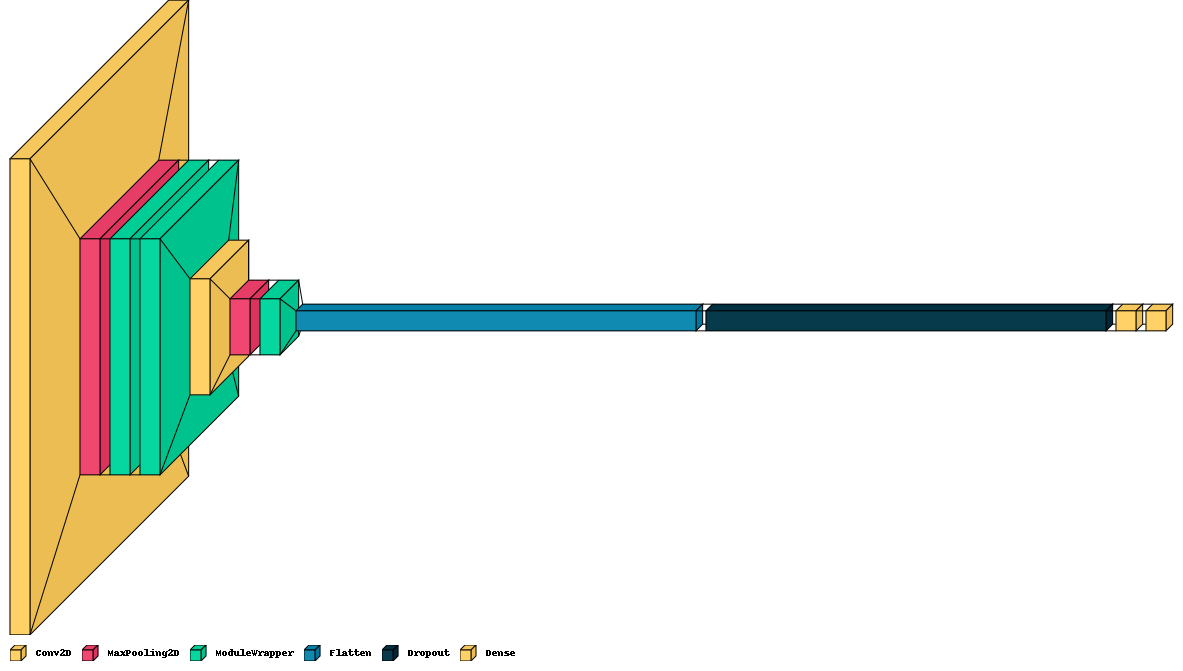

In [53]:
visualkeras.layered_view(model, legend=True)

In [54]:
class_weights = class_weight.compute_class_weight(class_weight = "balanced", classes= np.unique(y_train), y= y_train)
class_weights = dict(zip(np.unique(y_train), class_weights))
class_weights
#class weight

{0: 1.2291666666666667, 1: 0.8428571428571429}

In [55]:
history = model.fit(x_train,y_train,batch_size=32 ,epochs = 100, class_weight=class_weights, validation_data=(x_test, y_test),verbose=1)

Epoch 1/100
6/6 [==============================] - 5s 650ms/step - loss: 1.0297 - accuracy: 0.5932 - val_loss: 0.6452 - val_accuracy: 0.5395
Epoch 2/100
6/6 [==============================] - 5s 887ms/step - loss: 0.4831 - accuracy: 0.7797 - val_loss: 0.9646 - val_accuracy: 0.4737
Epoch 3/100
6/6 [==============================] - 3s 549ms/step - loss: 0.3490 - accuracy: 0.8644 - val_loss: 1.4111 - val_accuracy: 0.3816
Epoch 4/100
6/6 [==============================] - 3s 573ms/step - loss: 0.3025 - accuracy: 0.8588 - val_loss: 2.4945 - val_accuracy: 0.3421
Epoch 5/100
6/6 [==============================] - 4s 672ms/step - loss: 0.1596 - accuracy: 0.9492 - val_loss: 1.9672 - val_accuracy: 0.3421
Epoch 6/100
6/6 [==============================] - 5s 761ms/step - loss: 0.0835 - accuracy: 0.9661 - val_loss: 2.4738 - val_accuracy: 0.3421
Epoch 7/100
6/6 [==============================] - 3s 571ms/step - loss: 0.0355 - accuracy: 1.0000 - val_loss: 2.0281 - val_accuracy: 0.3816
Epoch 8/100
6

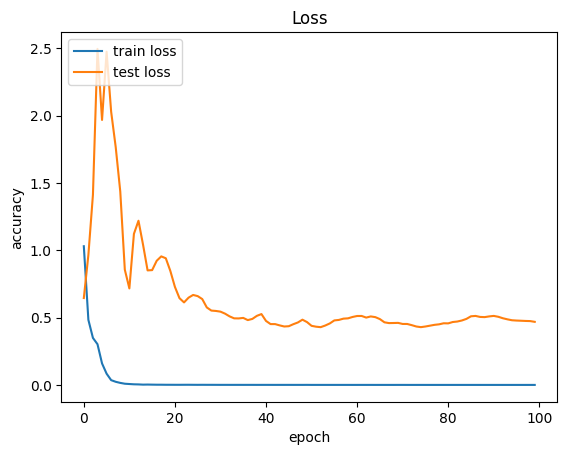

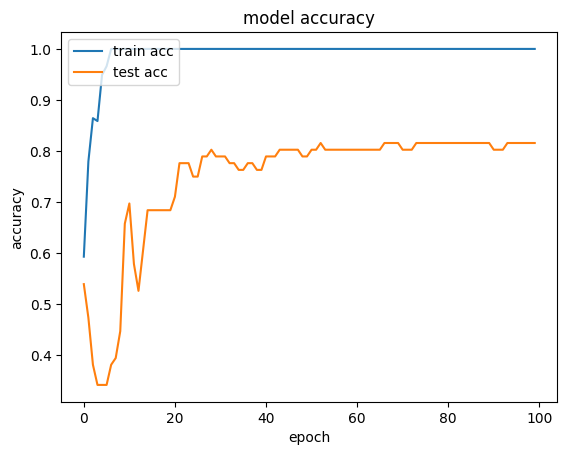

In [56]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train loss', 'test loss'], loc = 'upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train acc', 'test acc'], loc = 'upper left')
plt.show()


In [57]:
results = model.evaluate(x_test, y_test)
print('The current model achieved an accuracy of {}%!'.format(round(results[1]*100,2)))

3/3 [==============================] - 0s 124ms/step - loss: 0.4684 - accuracy: 0.8158
The current model achieved an accuracy of 81.58%!


In [ ]:
filepath='/content/gdrive/MyDrive/Colab Notebooks/model storage/B01.h5'
model.save(
    filepath,
    overwrite=True,
    include_optimizer=True,
    save_format='h5',
    signatures=None,
    options=None,
    save_traces=True,
)